#  Singlet doublet fermion dark matter model

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *


## Check one point

In [7]:
a=hep(MODEL='SimplifiedDMSSSFDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [9]:
pd.Series(a.LHA.blocks['MINPAR'].entries)

1    2.8000000E-01  # Lambda1IN
2      1.0000000E-02  # LamSHIN
3       0.0000000E+00  # LamSIN
4      2.0000000E+02  # MSinput
5     4.0000000E+02  # MDFinput
dtype: object

In [11]:
a.LHA.blocks['SPHENOINPUT'].entries[520]

'1.             # Write effective Higgs couplings (HiggsBounds blocks): put 0 to use file with MadGraph! '

In [18]:
a.LHA.blocks['YSIN'].entries

_dict([(1, '0.000000E+00   # Ys(1)'),
       (2, '0.000000E+00   # Ys(2)'),
       (3, '0.000000E+00   # Ys(3)')])

In [ ]:
v=a.vev
lambda_1=0.13
lambda_SH=1E-6
MS=1E4
mdf=200
Yse=1
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['SPHENOINPUT'].entries[520]='0.             # Write effective Higgs couplings (HiggsBounds blocks): put 0 to use file with MadGraph! '
a.LHA.blocks['MINPAR'][1]='%0.8E       # lambda1'  %lambda_1
a.LHA.blocks['MINPAR'][2]='%0.8E       # lambdaSH'  %lambda_SH
a.LHA.blocks['MINPAR'][4]='%0.8E       # MS'  %MS
a.LHA.blocks['MINPAR'][5]='%0.8E       # MDF' %mdf
a.LHA.blocks['YSIN'][1]='%0.8E       # Ys(1)' %Yse
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI,a.Series.sigmav

In [14]:
print moc

PROCESS: ~Re,~Re->AllEven,1*x{,h,g,A,Z,Wp,Wm,nu1,Nu1,nu2,Nu2,nu3,Nu3,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3
Processes of this type are absent
PROCESS: ~Re,~re->AllEven,1*x{,h,g,A,Z,Wp,Wm,nu1,Nu1,nu2,Nu2,nu3,Nu3,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3
PROCESS: QUARKS,~Re->QUARKS,~Re{d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3
Delete diagrams with _S0_!=1,_V5_,A
PROCESS: QUARKS,~Re->QUARKS,~Re{d1,D1,d2,D2,u1,U1
Delete diagrams with _V5_!=1,_S0_,A
PROCESS: h->2*x
PROCESS: ~Re,~re->Z,nu1,Nu1
Delete diagrams with Z!=2
PROCESS: ~Re,~re->Wp,e1,Nu1
Delete diagrams with Wp!=2
PROCESS: ~re,~re->AllEven,1*x{,h,g,A,Z,Wp,Wm,nu1,Nu1,nu2,Nu2,nu3,Nu3,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3
Processes of this type are absent

Masses of odd sector Particles:
~Re  : MRe   =   400.0 || ~Ss  : MSs   =  3482.1 || 
Xf=2.69e+01 Omega h^2=4.74e-02

# Channels which contribute to 1/(omega) more than 1%.
# Relative contributions in % are displayed
   12% ~Re ~re ->u1 U1 
   12% 

In [6]:
%%bash
cd ../micromegas/SDFDM
make main=main.c > /dev/null

In [7]:
mof=run_feynrules_SDFDM(MDF = -a.Series.MDF,MN = a.Series.MnINPUT,\
                        lu = a.Series.lamuINPUT,ld = a.Series.lamdINPUT ,v=a.vev)
#implement sigma_v
mo=a.micromegas_output(mof['Full']) # add a.micromegas pandas Series to object `a`.
print 'Omega h^2, SI proton, neutron =',a.micromegas.Omega_h2,a.micromegas.proton_SI,a.micromegas.neutron_SI,\
                                       a.micromegas.sigmav

Omega h^2, SI proton, neutron = 0.12 1.733e-11 1.768e-11 8.36e-27


## Scan $m_{DM}$
### Higgsilino-like

In [8]:
df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
dm_masses=np.linspace(100,1200,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %MDM  # -> Fill a.Series.MDF
    a.runmicromegas(Direct_Detection=True)
    mof=run_feynrules_SDFDM(MDF = -a.Series.MDF,MN = a.Series.MnINPUT,\
                        lu = a.Series.lamuINPUT,ld = a.Series.lamdINPUT ,v=a.vev)
    mo=a.micromegas_output(mof['Full'])
    a.Series['Omega_h2_official']=a.micromegas.Omega_h2
    a.Series['proton_SI_official']=a.micromegas.proton_SI
    a.Series['neutron_SI_official']=a.micromegas.neutron_SI
    a.Series['sigmav_official']=a.micromegas.sigmav
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

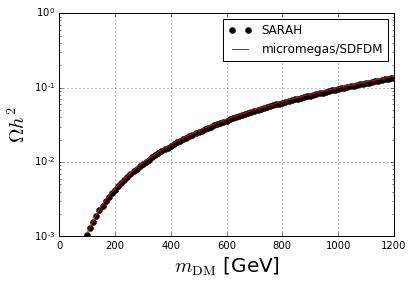

In [9]:
plt.semilogy(df.MDF,df.Omega_h2,'ko',label='SARAH')
plt.semilogy(df.MDF,df.Omega_h2_official,'r-',label='micromegas/SDFDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.legend(loc='best')
plt.savefig('omega.pdf')

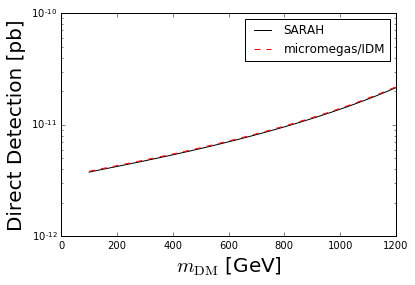

In [10]:
plt.semilogy(df.MDF,df.proton_SI,'k-',label='SARAH')
plt.semilogy(df.MDF,df.proton_SI_official,'r--',label='micromegas/IDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

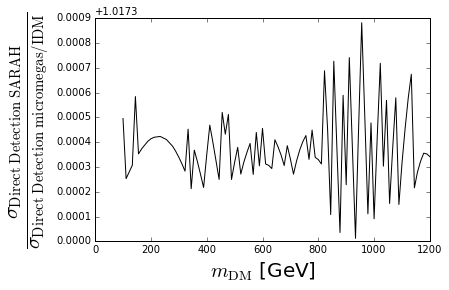

In [11]:
plt.plot(df.MDF,df.proton_SI_official/df.proton_SI,'k-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\frac{\sigma_{\rm Direct\ Detection\ SARAH}}{\sigma_{\rm Direct\ Detection\ micromegas/IDM}}$' ,size=30)

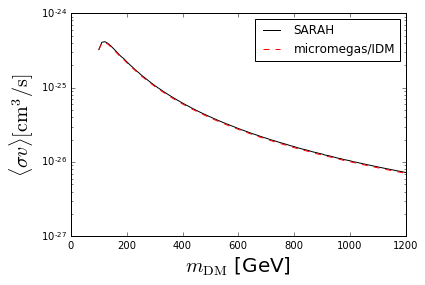

In [ ]:
plt.semilogy(df.MDF,df.sigmav,'k-',label='SARAH')
plt.semilogy(df.MDF,df.sigmav_official,'r--',label='micromegas/IDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\langle\sigma v \rangle [{\rm cm}^3/{\rm s}]$' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

### Singlet-like

In [ ]:
dn=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %1200  # -> Fill a.Series.MDF

dm_masses=np.linspace(100,1200,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][3]='%0.8E       #MN' %MDM  # -> Fill a.Series.MN
    a.runmicromegas(Direct_Detection=True)
    mof=run_feynrules_SDFDM(MDF = -a.Series.MDF,MN = a.Series.MN,\
                        lu = a.Series.lamuINPUT,ld = a.Series.lamdINPUT ,v=a.vev)
    mo=a.micromegas_output(mof['Full'])
    a.Series['Omega_h2_official']=a.micromegas.Omega_h2
    a.Series['proton_SI_official']=a.micromegas.proton_SI
    a.Series['neutron_SI_official']=a.micromegas.neutron_SI
    a.Series['sigmav_official']=a.micromegas.sigmav
    dn=dn.append(a.Series,ignore_index=True)

0


In [ ]:
plt.semilogy(dn.MN,dn.Omega_h2,'ko',label='SARAH')
plt.semilogy(dn.MN,dn.Omega_h2_official,'r-',label='micromegas/SDFDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.legend(loc='best')
plt.savefig('omega.pdf')

In [ ]:
plt.semilogy(dn.MN,dn.proton_SI,'k-',label='SARAH')
plt.semilogy(dn.MN,dn.proton_SI_official,'r--',label='micromegas/IDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

In [ ]:
plt.semilogy(dn.MN,dn.sigmav,'k-',label='SARAH')
plt.semilogy(dn.MN,dn.sigmav_official,'r--',label='micromegas/IDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\langle\sigma v \rangle [{\rm cm}^3/{\rm s}]$' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)